In [4]:
from IPython.display import Image, HTML, IFrame

<div class="row">
    <img class="center" src="assets/front_page.png"/> 
</div>

# Agenda


# Background

# The Problem

In [ ]:
Who here likes XXX?

How do you meet people who like XXX?

#### People are becoming more isolated, yet we are so connected in this century by the internet

## Mission

#### Reconnection of people
#### Simple way of meeting people with similar interests
#### Sharing treasures and knowledge that you find

# Solution
#### Using an easy medium of social networks to reconnect people in the real world through grouping and recommending people

# Meet Crafty Cats

<div class="container">
<div class="row">
    <img src="assets/tribe-crafty-types.png" alt="Drawing" style="width: 250px;"/> 
</div>
</div>

In [ ]:
# Discuss 6Tribes specific terminology

# Making recommendations is Easy

## Collaborative Filtering

Describe a brief explanation of collaborative filtering.
Amazon use case

### Users that join Tribe X join Tribe Y

<div class="container">
<div class="row">
    <img src="assets/collab.jpg" alt="Drawing" style="width: 250px;"/> 
</div>
</div>

#### No historical user behaviour data for a new user

# Content Based Filtering

### Project Users to Interest Space

<div class="container">
<div class="row">
    <img src="assets/ndim.jpg" alt="Drawing" style="width: 250px;"/> 
</div>
</div>

### Interest Space?

# Making good recommendations is hard

## Location

```python
{
   "data":[
      {
         "type": "photo",
         "orientation": "up",
         "mirrored": False,
         "location": {
            "latitude": -0.14533333,
            "longitude": 50.82383333
         },
         "timestamp": 1323430996000
      }
   ]
}
```

Location data are embedded in your photos.Also in the places you were tagged in facebook.

```python
    locations = [(-0.14, 50.82), (0.2, 52.94), ...]
```

```python
def places_api(lat, lon):
    # Wrapper function on top of
    # - Google maps
    # - Foursquare api
    return place
    
places = [places_api(lat, lon) for (lat, lon) in locations]
```

can someone guess what is the most common place in yout location data?

- what we ended up doing was to hardcode the most popular place our users have been
- the next step would be to create a script to detect a new popular location we have not included
- we would then use the places api to make us suggestions about potential places around that location
- with the goal at some day this whole process to be completely automated

```python
popular_places = {
    'hyde_park': [
        (51.504365, -0.152372),
        (51.512739, -0.159349),
        (51.509734, -0.188102),
        (51.502134, -0.184240)
    ],
    'shoreditch': [
        (51.535698, -0.114082),
        (51.518503, -0.073828),
        (51.531159, -0.073098),
        (51.526807, -0.106786)
    ]
}

def places_lookup(lat, lon):
    for name, coordinates in popular_places:
        if inside(lat, lon, coordinates):
            return name
    return None

places = [places_lookup(lat, lon) for (lat, lon) in locations]
```

# Music

- music from your iphone library
- integration from spotify as a next step

```python
{
   "data": [
      {
         "skipCount": 0,
         "playCount": 0,
         "title": "The innocent song",
         "albumTitle": "Songs of Innocence",
         "genre": "Rock",
         "artist": "U2",
         "lastPlayedDate": 1419328173273,
         "albumArtist": "U2"
      }
   ]
}
```

```python
"playCount": 0
```

Most of the songs have not been played or at lease we have no information of being played

```python
"lastPlayedDate": 1419328173273
```

From those that have been played, most have not been played recently. music tastes change

```python
"artist": "U2"
```

and of course the most popular artist was u2, cause...apple.

```python
def decay(timestamp):
    return math.abs(timestamp - 1419327173273) / 60 / 60 / 24
    
artists = [
     song['artist'], ))
     for song in song_library
     if song['artist'] != 'U2' and song['playCount'] * decay(song['lastPlayedDate'] > 10
]
```

## Likes

- likes were coming from facebook
- but could come from twitter as well
- and later we also had like functionality in the app

```python
{
    "data": [
        {
            "name": "Meat mission",
            "id": "1006041752818054",
            "created_time": "2016-04-24T16:30:31+0000",
            "category": "Restaurant / Café",
            "category_list": ["Burger restaurant"],
            "likes": 15
        }
    ]
}
```

that was not very helpful

```python
"category": "Restaurant / Café"
```

not very useful, too generic for our use case

```python
"category_list": ["Burger restaurant"]
```

only 20% had category list and some of them are not very descriptive

```python
"likes": 15,
```

lets not forget that some of the pages you like are you friends pages

```python
curated_categories = [
    'Burger restaurant',
    ...
]

def friend_page(page):
    if page['likes'] < 5000:
        return True
    return False

interests = [
    category
    for page in likes if not friends_page(page) 
    for category in page.get('category_list', []) if category in curated_categories
]
```

like pages also have a a lot of text in their descriptions and posts 

# Posts

- your status updates
- your comments
- the text in your likes
- your tweets potentially

```python
{
    "data": [
        {
          "message": "Top 10 women the Don (Trump) has slept with http://youtu.be/9GwEcsQefB",
          "link": "http://youtu.be/9GwEcsQefB",
          "created_time": "2014-11-26T15:21:59+0000",
          "id": "10152206092817233_10152447432882233"
        }
    ]
}
```

- your status updates
- your comments
- the text in your likes
- your tweets potentially

```python
{
    "data": [
        {
          "message": "Top 10 women the Don (Trump) has slept with http://youtu.be/9GwEcsQefB",
          "link": "http://youtu.be/9GwEcsQefB",
          "created_time": "2014-11-26T15:21:59+0000",
          "id": "10152206092817233_10152447432882233"
        }
    ]
}
```

```python
"message": "Top 10 women the Don (Trump) has slept with http://youtu.be/9GwEcsQefB"
```

- A message can be ubiquitous. It can also have negative sentiment.
- We do not know if this person is a supporter of Trump or democrats.

```python
"link": "http://youtu.be/9GwEcsQefB"
```

- A link does not always contain text. Identifying the content of the link is a separate interesting topic by itself.

Other Practical considerations
- You are not the only one posting in your wall
- Some posts are private, others shared with selected friends

```python
def topics(link):
    ## wrapper on top of
    #  - prismatic api
    #  - alchemy api
    #  - or our local keyword extractor 
    return topics

interests = [topic for post in posts if 'link' in post for topic in topics(link)]
```

- reality check.
- separating if the post is about a song or news or something else is an interesting topic by itself.

- Location filtering - not related to interests
- Enrich data with the type of places you visit: Coffee shops, Art galleries, Rock climbing centers...

API's:

- Here
- Foursquare
- Maps (Google)

All pretty $$$ for a startup trying to scale....

## Posts

- Posts vary widely across users: some emotionally driven posts, some random clips, music, auto-generated
- Limited text: limited insight

API's:

- Alchemy: extracting further information from links shared
- Prismatic: extracting links


## Music

- Has relevance to people that love music, little relevance to others
- An interest in its own right
- Incomplete and often old

API's:

- Itunes


## Likes

# Making recommendations without data is impossible. Or is it?

# Engineering

<div class="container">
<div class="row">
    <img src="assets/opbeat.png" alt="Drawing" style="width: 500px;"/>
</div>
</div>

- State why use ES: powerful, scalability
- Recommendations became retrieval: finding most recommended
- MLT: issues behind this: if document is empty, tweek of MLT. Personalisation, need to improve MLT

```json
{
    "settings": {
        "analysis": {
            "filter": {
                "my_english_stopwords":{
                    "type": "stop",
                    "stopwords": "_english_"
                },
                "name_synonym_filter" : {
                    "type" : "synonym",
                    "synonyms" : ["kung foodies => kung foodies,food",
                                  "arthouse => art,art house,arthouse",
                                  "let there be house => house,music,let there be house",
                                  "scene shifters=>theatre,scene shifters",
                                  "wanderlusters=> wanderlusters,travel"
                                ]
                },
                "minimal_english_stemmer" : {
                    "type" : "stemmer",
                    "name" : "minimal_english"
                }
          },
            "analyzer": {
                "my_lowercase_keyword":{
                    "type": "custom",
                    "tokenizer": "keyword",
                    "filter": ["standard", "lowercase", "my_english_stopwords", "minimal_english_stemmer"]
                },
                "name_synonyms" : {
                      "tokenizer" : "whitespace",
                      "filter" : ["standard", "lowercase","name_synonym_filter",  "minimal_english_stemmer"]
                },
                "basic_standard_with_min_english": {
                    "type": "custom",
                    "tokenizer" : "standard",
                    "filter": ["standard", "lowercase", "my_english_stopwords", "minimal_english_stemmer"]
                }
            }
        }
    }, ....
    
```

- Microservice

Flask api to handle DS requests and iterate quickly

- Iterate quickly
- Microservice
- Built our own API
- Scala and Python
- Tech agnostic

## GET /tribes

Required query parameters

- match_user_id

```
{
   "data": [
      {
          "id": 1000000000000018,
          "score": 0.89
      },...
   ]
}
```

- Enrichment

- Api's are your friend
- Use many then cut down and consider $$$

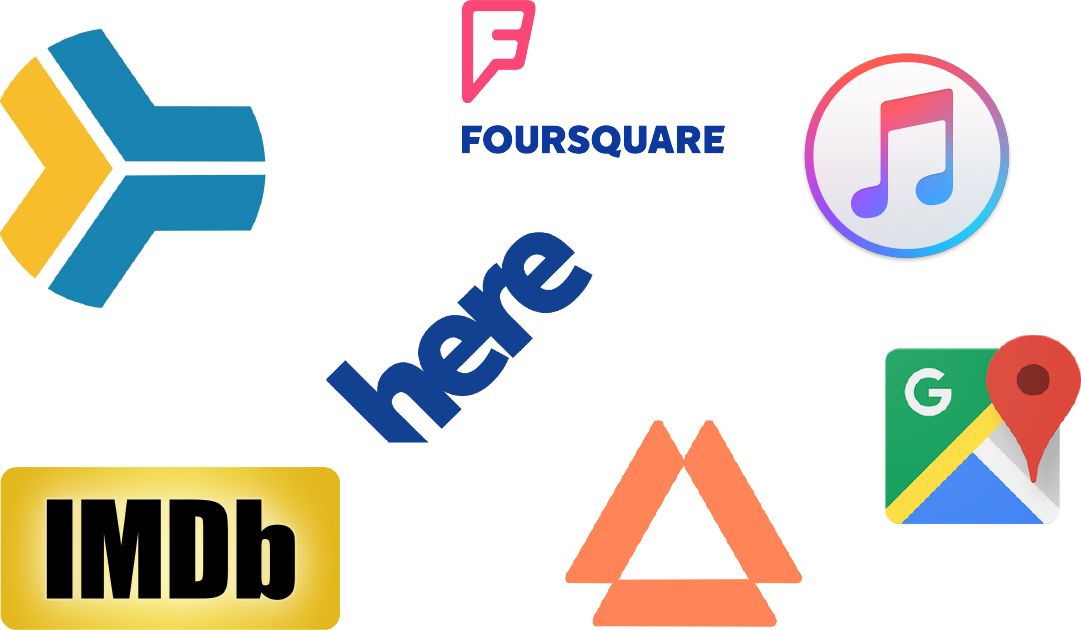

In [5]:
Image('logos/logos.png')

# Scalability

- Workers handling request
- Distinguish betweetn instant recommendations and batch

- elasticsearch: reading
- writing data: workers needed

# Deployment and Improving

- CircleCI

- continuous integration and deployment
- fix errors quickly
- no waiting around
- git push -f : protecting branches

# Lessons Learned

<div class="container">
<div class="row">
 <div class="col-md-6 center">
    <img src="assets/ruby.png" alt="Drawing" style="width: 250px;"/>
    <p>@RubyChilds</p>
    <p>ruby.childs1@gmail.com</p>
 </div>
  <div class="col-md-6 center">
    <img src="assets/nick.png" alt="Drawing" style="width: 250px;"/> 
     <p>@NSorros</p>
      <p>nsorros@gmail.com</p>
  </div>
</div>
</div>

# Q&A